# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import matplotlib.patheffects as path_effects

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [5]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

What years are represented in the data?

In [6]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [7]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [12]:
# remane 'Life expectancy at birth (years)'
df.rename(columns={df.columns[2]:'LEABY'}, inplace=True)

In [13]:
# remane 'United States of America'
df.Country.replace({'United States of America':'USA'}, inplace=True)
print(df[df.Country == 'USA'].head())

   Country  Year  LEABY           GDP
64     USA  2000   76.8  1.030000e+13
65     USA  2001   76.9  1.060000e+13
66     USA  2002   77.0  1.100000e+13
67     USA  2003   77.2  1.150000e+13
68     USA  2004   77.5  1.230000e+13


Run `df.head()` again to check your new column name worked.

In [14]:
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

In [15]:
# GDP in Billions
df.GDP = df.GDP*1e-10

# Average GDP per Country between 2000-2015
avg_gdp = pd.DataFrame({'Avg_GDP': df.groupby('Country').GDP.mean()}).reset_index()
print(avg_gdp)


    Country      Avg_GDP
0     Chile    16.978885
1     China   495.771375
2   Germany   309.477563
3    Mexico    97.665063
4       USA  1407.500000
5  Zimbabwe     0.906258


<IPython.core.display.Javascript object>


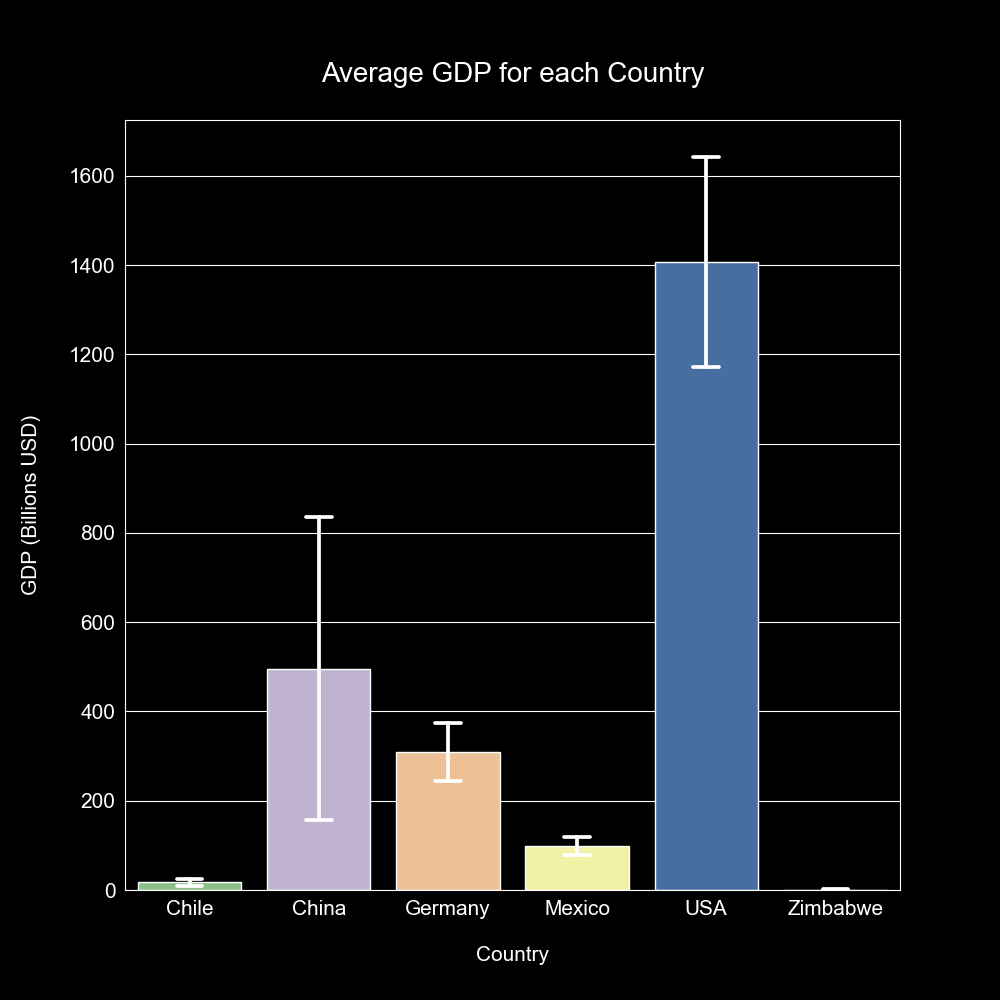

In [17]:
# Average GDP by Country Barchart with Seaborn

# Set color palette
sns.set_palette('Accent')

# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure
plt.figure(figsize=(10,10))

# Create the bar plot with Seaborn
ax = sns.barplot(data=df, x='Country', y='GDP', errcolor='white', ci='sd', capsize=.2)
ax.set_title('\nAverage GDP for each Country\n', fontsize=20, color='white')
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nGDP (Billions USD)\n', fontsize=15,color='white')
# Ticks
ax.tick_params(axis='both', colors='white', labelsize=15)
plt.savefig('Avg_GDP Barchart with Seaborn.png', facecolor=ax.get_facecolor())
plt.show()

On average USA shows the highest GDP at approximately 1407 Billion USD.The error bar on the USA does not overlap the rest of the other error bars. We can conclusively confirm that USA has the highest GDP compared to the other countries.

The average GDP for Zimbabwe at approximately 0.9 Billion USD is lower that the rest of the other countries. Based on the error bar, there is no over lap with the other countries so we can the majority of data for Zimbabwe is different from all of the others. We can can conclusively say Zimbabwe has the lowest GDP.

Data between China and Germany is inconclusive since the error bars over lap each other so we cant confirm which is higher.

Mexico comes in fourth and followed by Chile.

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

In [18]:
# Average Life Expectancy between (2000 - 2015)

avg_LEABY = pd.DataFrame({'Avg_LEABY': df.groupby('Country').LEABY.mean()}).reset_index()
print(avg_LEABY)

    Country  Avg_LEABY
0     Chile   78.94375
1     China   74.26250
2   Germany   79.65625
3    Mexico   75.71875
4       USA   78.06250
5  Zimbabwe   50.09375


<IPython.core.display.Javascript object>


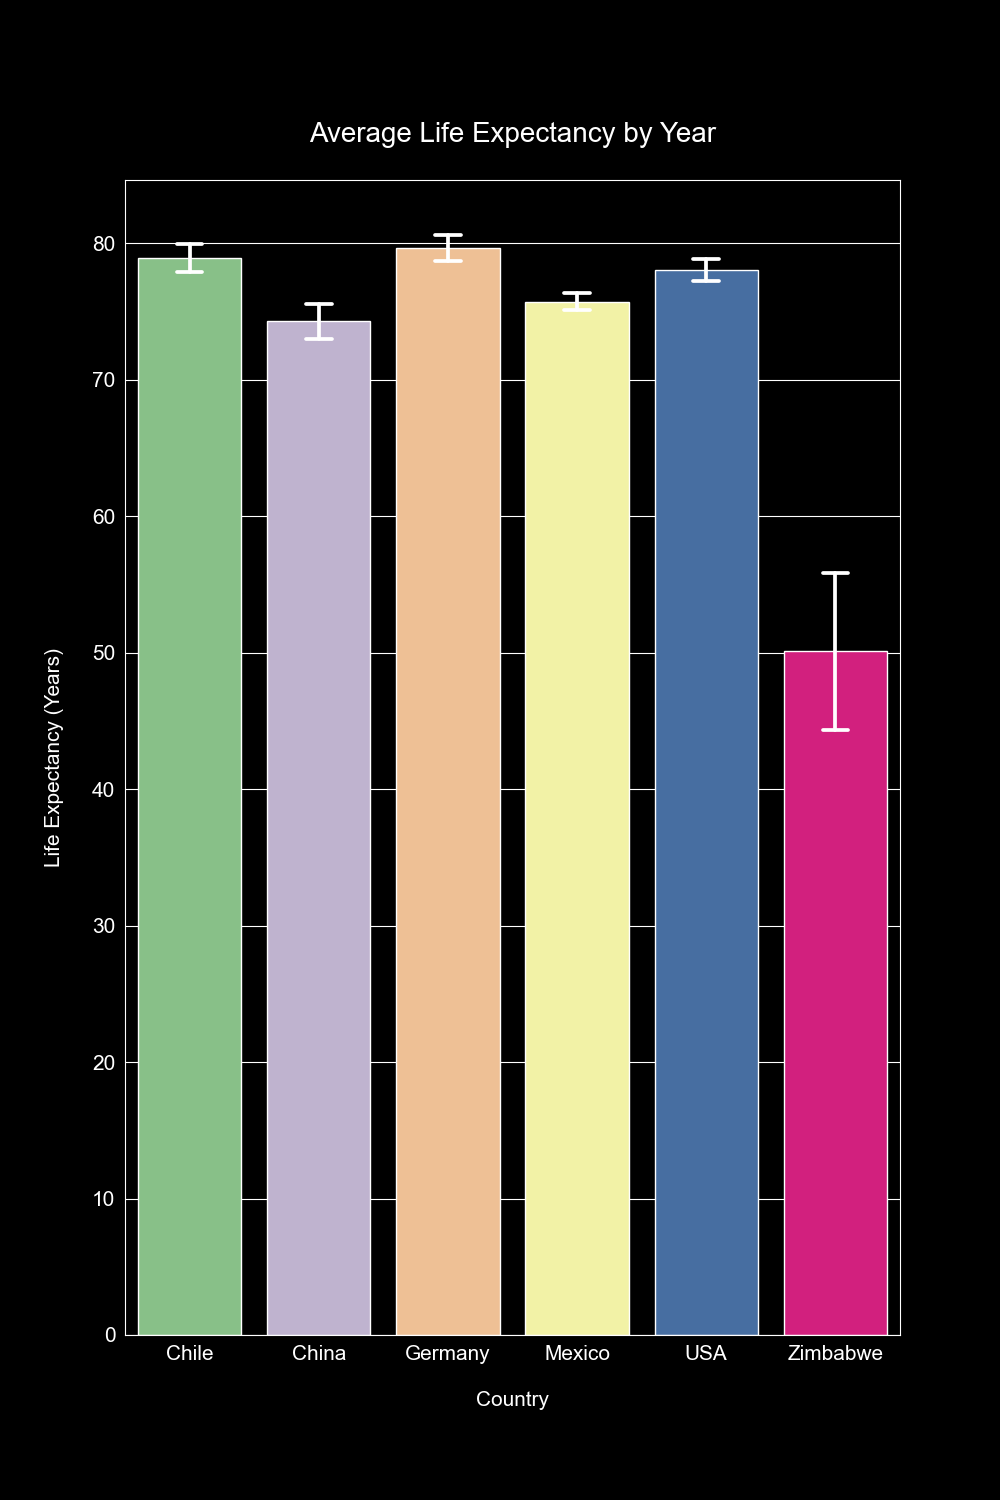

In [19]:
# Set color palette
sns.set_palette('Accent')

# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure
plt.figure(figsize=(10,15))

# Create the bar plot with Seaborn
ax = sns.barplot(data=df, x='Country', y='LEABY', errcolor='white', ci='sd', capsize=.2)
ax.set_title('\nAverage Life Expectancy by Year\n', fontsize=20, color='white')
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nLife Expectancy (Years)\n', fontsize=15,color='white')
# Ticks
ax.tick_params(axis='both', colors='white', labelsize=15)
plt.savefig('Average Life Expectancy (2000 - 2015) Barchart with Seaborn.png', facecolor=ax.get_facecolor())
plt.show()

On average Germany has the highest Life Expectancy at approximately 80 years betwen the period of 2000 - 2015. However the error bar on the Germany overlaps with that of Chile so its inconclusive to say Germany has the the highest Life Expectancy since a significant portion of data is found in Chile.

Which Country has the Lowest Life Expectancy?

On average Zimbabwe has the Lowest Life Expectancy in years.The error bar on the Zimbabwe do not overlap with any of the other countries. We can conclusively confirm Zimbabwe has the lowest GDP

What do you notice about the two bar charts? Do they look similar?

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

<IPython.core.display.Javascript object>


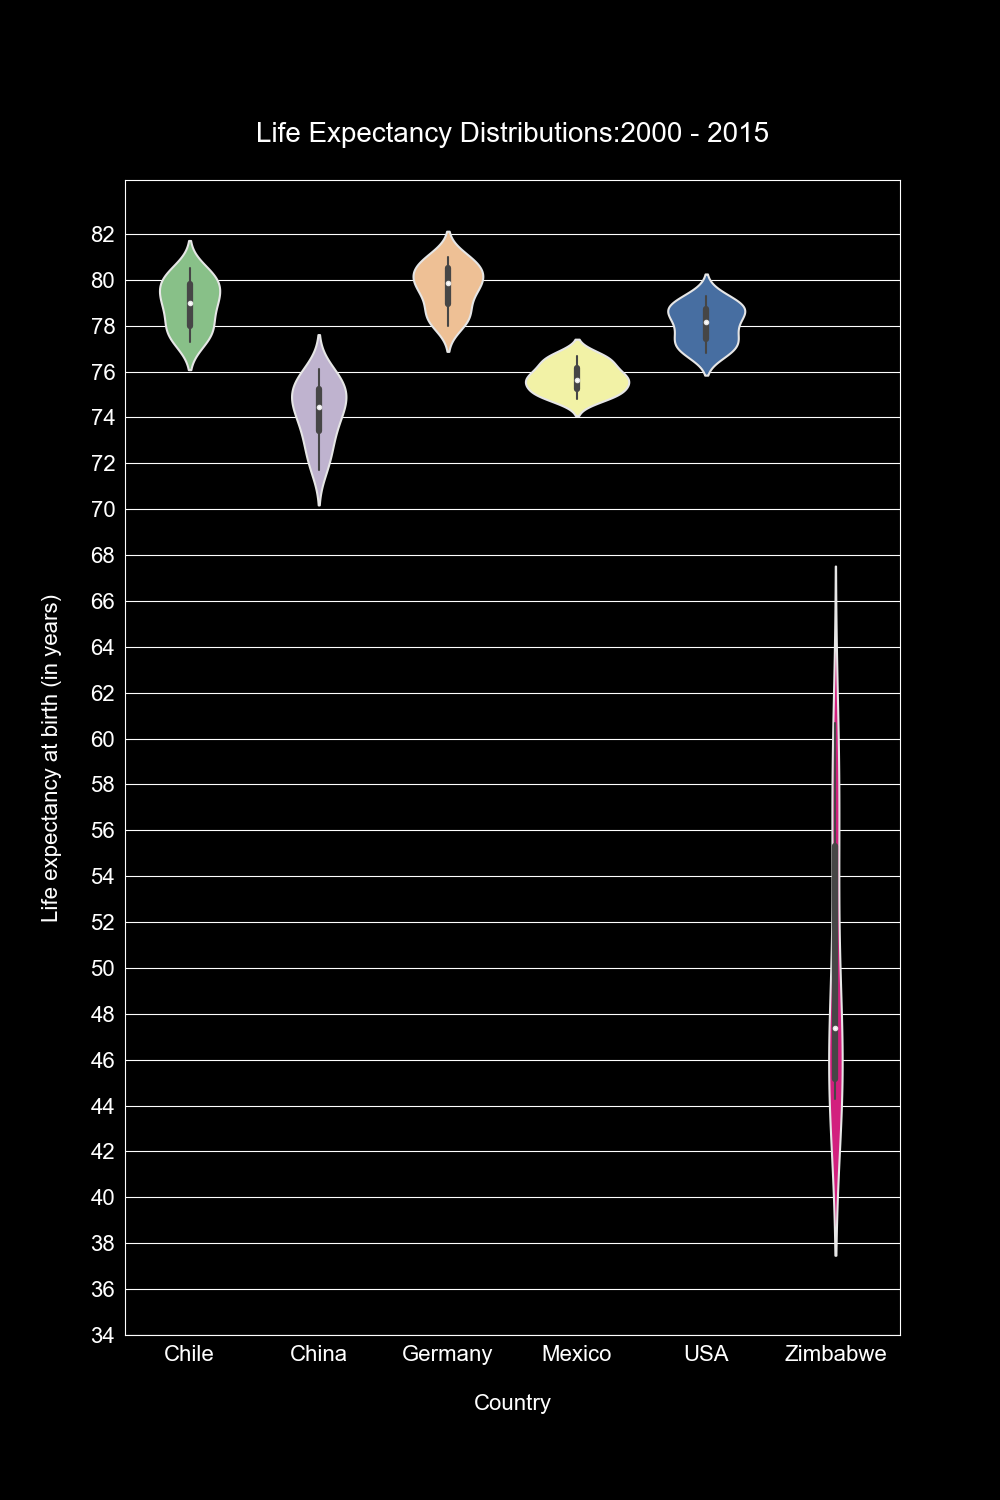

In [21]:
fig = plt.subplots(figsize=(10, 15)) 
# Set color palette
sns.set_palette('Accent')
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Add your code below:
ax = sns.violinplot(data=df, x="Country", y="LEABY")
plt.setp(ax.collections, edgecolor='#e6e6e6')
ax.set_title('\nLife Expectancy Distributions:2000 - 2015\n', fontsize=20, color='white')
# Label x and y axises
ax.set_yticks(range(34, 84, 2))
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.set_xlabel('\nCountry\n', fontsize=16, color='white')
# Ticks
ax.tick_params(axis='both', colors='white', labelsize=16)
ax.set_ylabel('\nLife expectancy at birth (in years)\n', fontsize=16, color='white')
plt.savefig('Life Expectancy Distributions Violin Plots with Seaborn.png', facecolor=ax.get_facecolor())
plt.show() 

What do you notice about this distribution? Which country's life expactancy has changed the most?

Based on the chart above, Chile and Germany's distribution LEABY (2000-2015) figures are very similar, with Germany having a little denser concentration of LEABY at 80 years, and their averages LEABY being roughly the same.

Chile LEABY distribution spreads between 76 and 81.5 years compared to Germany with a LEABY distribution spread between 76.9 and 82 years.

The US distribution LEABY is remarkably similar in shape to the Germany distribution but with the US having its highest concentration of LEABY at 78.5 years instead of 80 years and with the US having almost no LEABY higher than 80 years. This cofirms that Germany has the highest Life Expectancy.
The US LEABY distribution spreads between 76 and 81.5 years compared to Germany with a LEABY distribution spread between 76.9 and 80.3 years.

Mexico and China have roughly an average LEABY of 74 years and 75.5 years respectively. China has a more broadly distributed LEABY between 70 and 77.5 years, compared to Mexico with a distribution spread between 74 and 77.5 years.
Mexico highest concentration of LEABY is at 75.5 years.

Zimbabwe has the most spread out distribution LEABY (2000-2015) shape, from 37.5 to 67.5 years. It has also the lowest average LEBAY at 50 years. This makes Zimbabwe with the most change in life Expectancy over the period of 2000 - 2015.

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


<IPython.core.display.Javascript object>


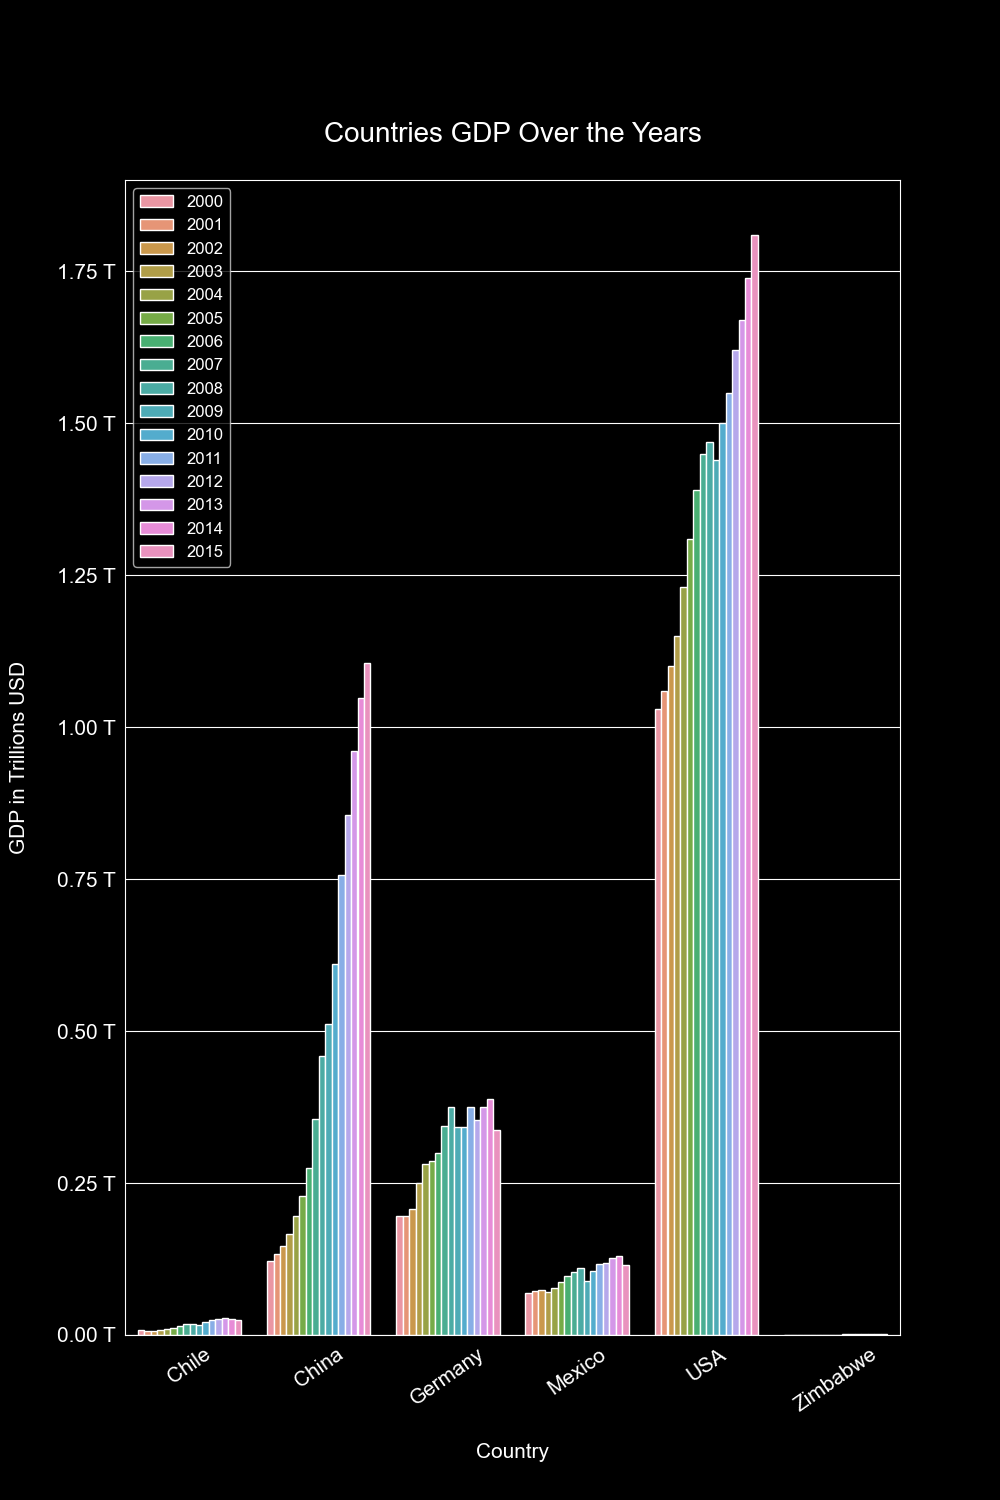

In [22]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(10, 15))


# Use Seaborn to create the bar plot, GDP in Trillions USD
ax = sns.barplot(data=df, x='Country', y=df.GDP*1e-3, hue="Year")

# Add a title 
ax.set_title('\nCountries GDP Over the Years\n', fontsize=20, color='white')

# Label x and y axes 
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nGDP in Trillions USD\n', fontsize=15, color='white')
plt.xticks(rotation=35)

# ticks
ax.tick_params(axis='both', colors='white', labelsize=15)
# Add billion unit
fmt = '{x:,.2f} T'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Legend to the left
legend = plt.legend(loc=2, fontsize=12)
plt.setp(legend.get_texts(), color='w')
plt.savefig('GDP per Year Bar Chart Seaborn.png', facecolor=ax.get_facecolor())
plt.show()


We can see the countries' growth rate over the years. Zimbabwe is bearly even visible. Lets calculate GDP growth rate for each country over 15 years.

In [23]:
# countries GDP growth rate (2000-20015) DataFrame
df_gdp_growth_rate = pd.DataFrame({'Country': df.Country.unique(), 
                                   'gdp_2000': df.loc[(df['Year']==2000), 'GDP'].values,
                                   'gdp_2015': df.loc[(df['Year']==2015), 'GDP'].values})
# GDP growth rate per country
df_gdp_growth_rate['growth_rate']= (df_gdp_growth_rate.gdp_2015 - df_gdp_growth_rate.gdp_2000)/df_gdp_growth_rate.gdp_2000
print('\nCountries GDP growth rate, in the 15 years period 2000-2015')

df_gdp_growth_rate.sort_values(by='growth_rate', ascending=False).reset_index(drop=True).head(6)


Countries GDP growth rate, in the 15 years period 2000-2015


,Country,gdp_2000,gdp_2015,growth_rate
0,China,121.135000,1106.470000,8.134189
1,Chile,7.786093,24.251800,2.114758
2,Zimbabwe,0.668996,1.630467,1.437186
3,USA,1030.000000,1810.000000,0.757282
4,Germany,194.995000,337.561000,0.731126
5,Mexico,68.364800,115.226000,0.685458


All the countries listed on the chart had a GDP growth between 2000 and 2015 with China having a gigantic exponential GDP growth rate of 8.13.

In other words, China grew 813% between 2000 and 2015 compared to the US with 75% growth between 2000 and 2015.

Chile had significant 211% growth between 2000 and 2015. Most countries had their GDP drop in 2009 with the exception of China and Zimbabwe (see Zimbabwe GDP (in Billions USD)).

After 2009 Germany had erratic GDP levels, dropping and rising almost from one year to another, with a significant drop in 2015.

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


<IPython.core.display.Javascript object>


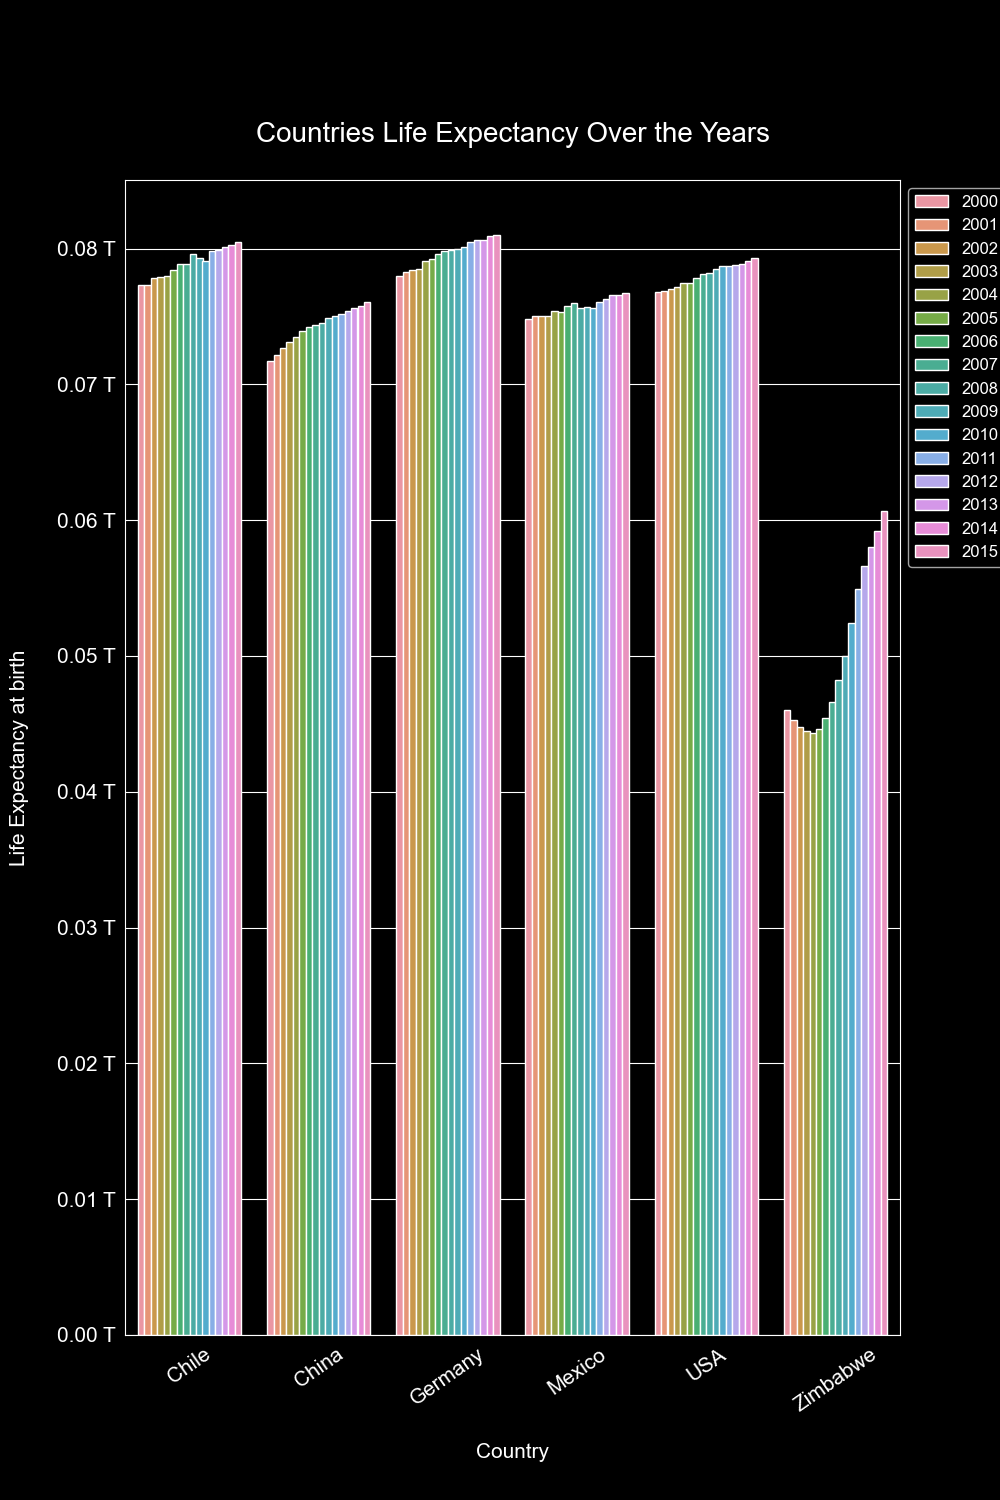

In [24]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(10, 15))


# Use Seaborn to create the bar plot, GDP in Trillions USD
ax = sns.barplot(data=df, x='Country', y=df.LEABY*1e-3, hue="Year")

# Add a title 
ax.set_title('\nCountries Life Expectancy Over the Years\n', fontsize=20, color='white')

# Label x and y axes 
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nLife Expectancy at birth\n', fontsize=15, color='white')
plt.xticks(rotation=35)

# ticks
ax.tick_params(axis='both', colors='white', labelsize=15)
# Add billion unit
fmt = '{x:,.2f} T'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Legend to the left
legend = plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.setp(legend.get_texts(), color='w')
plt.savefig('Life Expectancy per Year Bar Chart Seaborn.png', facecolor=ax.get_facecolor())
plt.show()


In [25]:
# countries LEABY growth rate (2000-20015) DataFrame
df_leaby_growth_rate = pd.DataFrame({'Country': df.Country.unique(), 
                                   'leaby_2000': df.loc[(df['Year']==2000), 'LEABY'].values,
                                   'leaby_2015': df.loc[(df['Year']==2015), 'LEABY'].values})
# GDP growth rate per country
df_leaby_growth_rate['growth_rate'] = (df_leaby_growth_rate.leaby_2015 - df_leaby_growth_rate.leaby_2000)/ \
    df_leaby_growth_rate.leaby_2000
print('\nCountries LEABY growth rate, in the 15 year period 2000-2015')

df_leaby_growth_rate.sort_values(by='growth_rate', ascending=False).reset_index(drop=True).head(6)


Countries LEABY growth rate, in the 15 year period 2000-2015


,Country,leaby_2000,leaby_2015,growth_rate
0,Zimbabwe,46.0,60.7,0.319565
1,China,71.7,76.1,0.061367
2,Chile,77.3,80.5,0.041397
3,Germany,78.0,81.0,0.038462
4,USA,76.8,79.3,0.032552
5,Mexico,74.8,76.7,0.025401


The LEABY increased over time in all six countries, but Zimbabwe has had the most significant growth of LEABY, with a growth of 32% LEABY between 2000 and 2015. It is important to note that Zimbabwe also experienced a decrease of LEABY between 2000 and 2004.

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
In GDP:
China had the largest growth in GDP, 813%.
Zimbabwe had a drop in GDP from 2000 to 2008, and then its GDP grew 269%.
After 2009, Germany had erratic GDP levels.

In LEABY:
Zimbabwe had a growth of 32% LEABY from 2000 to 2015,
but Zimbabwe also experienced a decrease of LEABY between 2000 and 2004,
and it has the lowest average (2000-2015) LEABY at 50 years.

- What years are there the biggest changes in the data?
The biggest changes of data occurred in the GDPs of China, Chile and the US, and in the Zimbabwe LEABY.

- Which country has had the least change in GDP over time? 
Mexico experienced the least change of all the countries both in its GDP and LEABY, 68% and 4% respectively.

- How do countries compare to one another?
In GDP:
Overtime, the US had a significantly higher GDP than all other countries.
China had a gigantic GDP growth compared to all other countries.
Chile had very low GDP compared to the US, but it had a significant GDP growth of 211%.
Zimbabwe had an extremely low GDP compared to all other countries.

In LEABY:
Overtime, Zimbabwe had the most significant increase of LEABY, but it had a very low average LEABY growth compared to all other countries.
Germany had the highest average LEABY at 80 years.

Mexico, compared to all other countries, had an average in the low range for its GDP and in the low-medium range for its LEABY,
with an averarge GDP of 97.6 milions USD and an average LEABY of 75.7 years.

- Can you think of any reasons that the data looks like this for particular countries?
Most countries GDPs dropped in 2008-09, during that period, the world was experiencing a worldwide financial and automobile crisis.
Zimbabwe had its GDP and LEABY drop between 2000 and 2004, during that period, Zimbabwe was experiencing violent civil unrest.

- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy? 

A country's ecnomic success has an impact on Life expectancy in the region. the data on the bar charts is inconclusive to confirm the assumption so we analyse this futher.

Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


<IPython.core.display.Javascript object>


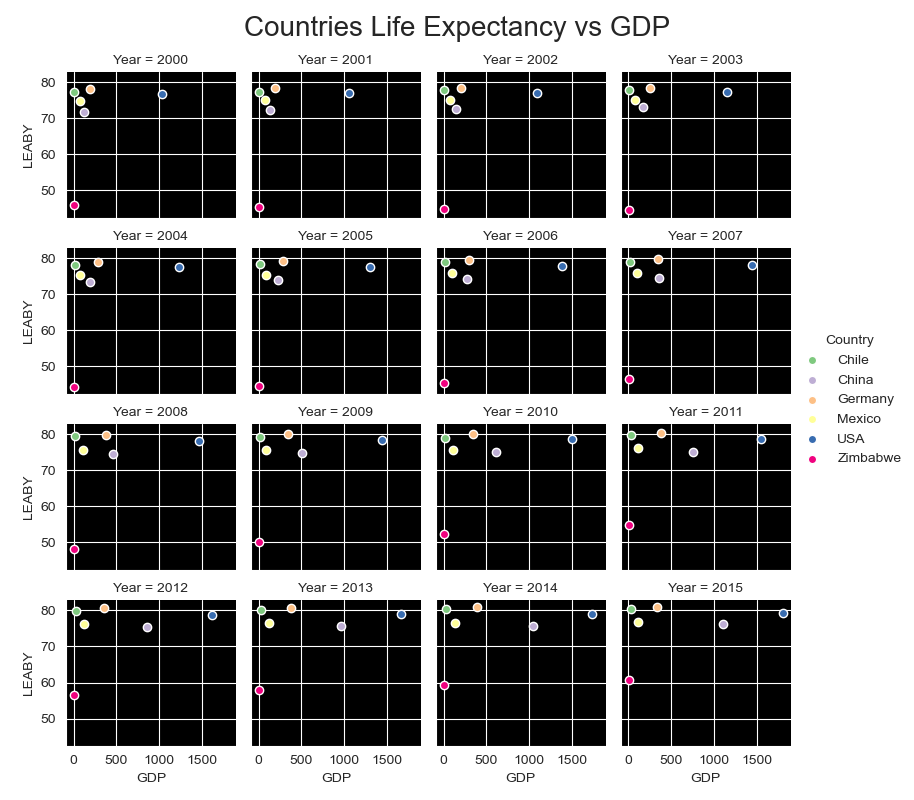

In [28]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor':'black'})
sns.set_palette('Accent')
# grid
g = sns.FacetGrid(df, col='Year', hue='Country',col_wrap=4, height=2)
g = (g.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend())
plt.subplots_adjust(top=0.91)
g.fig.suptitle('Countries Life Expectancy vs GDP', fontsize=20) 
plt.savefig('Life Expectancy and GDP.png', facecolor=ax.get_facecolor())
plt.show()

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

China had the largest motion on the X axis, with a GDP growth of 813%.

Zimbabwe had the largest motion on the Y axis, with LEABY growth of 32%.

It is not surprising. During the 2000-2015 period, China had the largest GDP growth and Zimbabwe had the largest LEABY growth.

Scatter plots are a good tool to visualize the distribution of the combine countries GDPs and LEABYs per year, but it makes it difficult to see the individual evolution of the country GDPs and LEABYs over the years. Line plots would be a more suitable choice for that purpose.

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



<IPython.core.display.Javascript object>


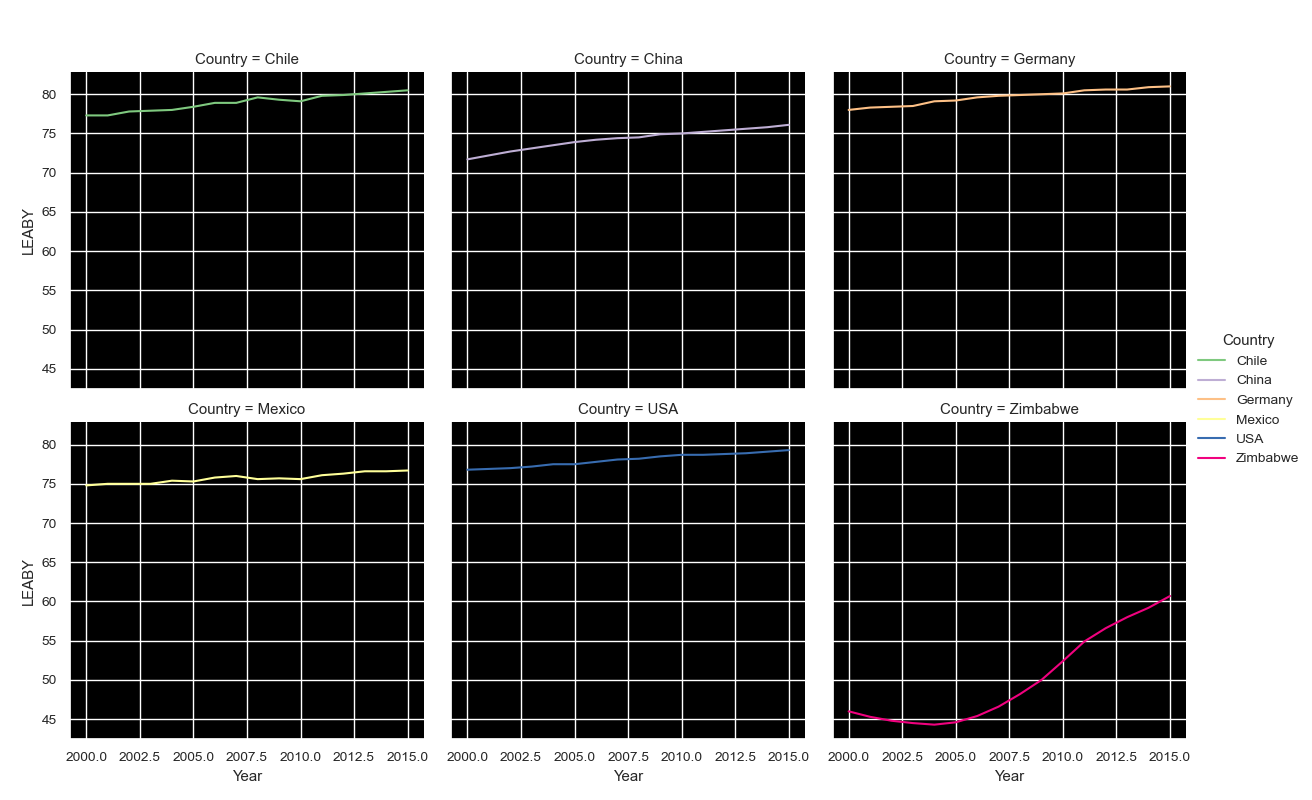

In [45]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"


# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor':'black'})
sns.set_palette('Accent')

# grid Chart
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, hue='Country', height=4)
g3 = (g3.map(plt.plot, "Year", "LEABY").add_legend())
    
# Add a Title to the grid
plt.subplots_adjust(top=0.91)
g.fig.suptitle('Countries Life Expectancy', fontsize=20) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('life expectancy facetgrid_lineplot.png')
plt.show()


What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

Zimbabwe had the most change in LEABY, with a LEABY growth of 32%.

All the countries LEABYs increased between 2000 and 2015, but Zimbabwe experienced a decrease of LEABY between 2000 and 2004, and a radical increase between 2005 and 2015.

Mexico had the least change in LEABY, with a LEABY gowth of 2.5%.

All the countries benefited from advancements in medical technology resulting in a LEABY growth in all the countries. Zimbabwe experienced a violent civil unrest between 1999 and 2006, affecting greatly their LEABY during that period.
Mexico did not experience political unrest and had no major changes in its health care system, resulting in the smallest LEABY growth.

China's gigantic GDP increase probably had an influence on its citizens access to and quality of health care.
China experienced a slight LEABY increase, with a 6% LEABY growth.

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


<IPython.core.display.Javascript object>


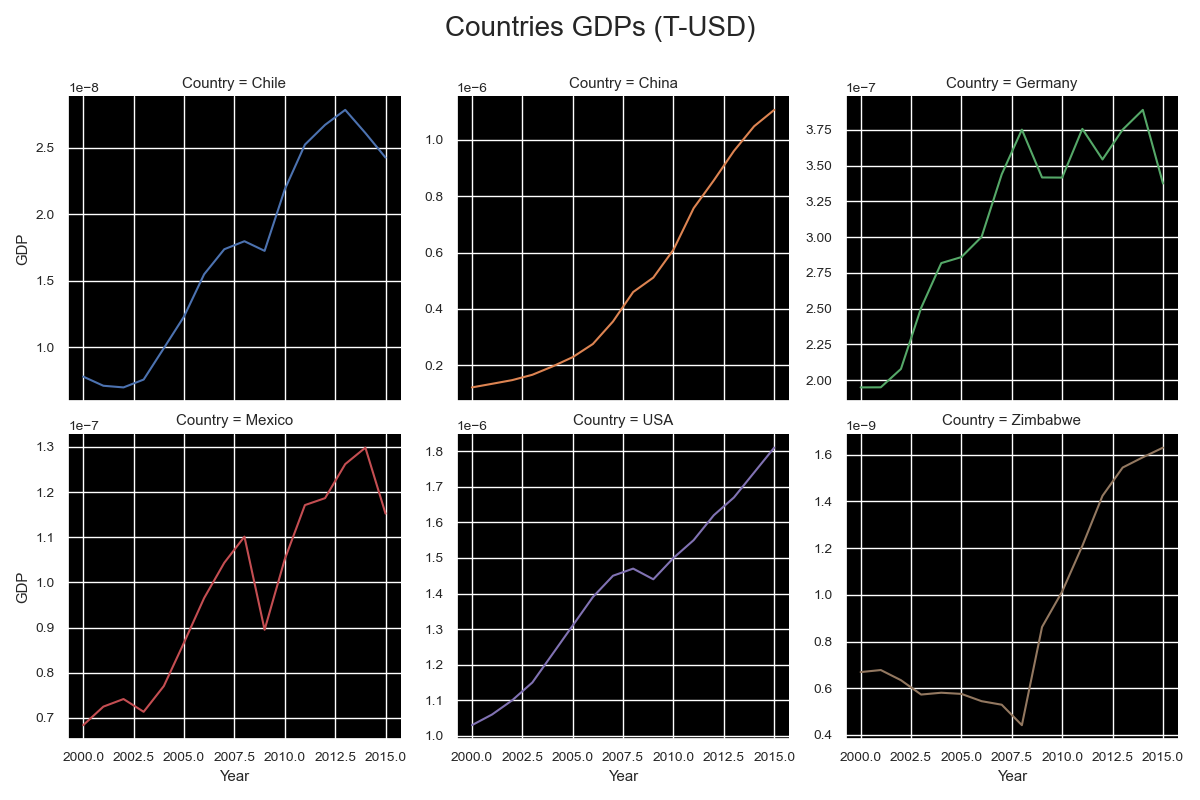

In [47]:

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# grid Chart
# gdp in Trillions
df.GDP=df.GDP*1e-3
g = sns.FacetGrid(data=df, col='Country', col_wrap=3, hue='Country', height=4, sharey = False)
g = g.map(plt.plot, 'Year', 'GDP')

# Add a Title to the grid
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Countries GDPs (T-USD)', fontsize=20) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('GDPfacetgrid line plots.png')
plt.show()

Which countries have the highest and lowest GDP?

In [68]:
#Let’s isolate the GDP column
gdp = df.GDP
# Find median GDP 
median_gdp = np.quantile(gdp, 0.5)
print("The median of GDP is: " + str(median_gdp))

The median of GDP is: 1.28022e-07


Low GDP data group and High GDP data group
Select all of the rows from our original dataset that have a GDP less than or equal to the median to

In [64]:
# extract rows with gdp <= median
low_gdp = df[df['GDP'] <= median_gdp]
print('Countries with low GDP: ' + low_gdp['Country'].unique())

['Countries with low GDP: Chile' 'Countries with low GDP: China'
 'Countries with low GDP: Mexico' 'Countries with low GDP: Zimbabwe']


In [65]:
# extract rows with gdp >= median
high_gdp = df[df['GDP'] > median_gdp]
print('Countries with High GDP: ' + high_gdp['Country'].unique())

['Countries with High GDP: China' 'Countries with High GDP: Germany'
 'Countries with High GDP: Mexico' 'Countries with High GDP: USA']


Which countries have the highest and lowest life expectancy?

In [77]:
#Let’s isolate the column that contains the life expectancy
life_expectancy = df.LEABY
# Find median GDP 
median_LEABY = np.quantile(life_expectancy, 0.5)
print("The median of LEABY is: " + str(median_LEABY))

The median of GDP is: 76.75


In [79]:
# extract rows with LEABY <= median
low_LEABY = df[df['LEABY'] <= median_LEABY]
print('Countries with low life_expectancy in years: ' + low_LEABY['Country'].unique())

['Countries with low life_expectancy in years: China'
 'Countries with low life_expectancy in years: Mexico'
 'Countries with low life_expectancy in years: Zimbabwe']


In [80]:
# extract rows with LEABY >= median
high_LEABY = df[df['LEABY'] >= median_LEABY]
print('Countries with high life_expectancy in years: ' + high_LEABY['Country'].unique())

['Countries with high life_expectancy in years: Chile'
 'Countries with high life_expectancy in years: Germany'
 'Countries with high life_expectancy in years: USA']


Further Analysis
Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group compares to each other.

In [81]:
# calculate the Life Expectancy quartiles 
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[74.475 76.75  78.9  ]


By looking at those three values you can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together — a quarter of the data is between 76.75 years and 78.9 years.

In [87]:
# quartiles of the "Life Expectancy" column of low GDP.
low_gdp_quartiles = np.quantile(low_gdp["LEABY"], [0.25, 0.5, 0.75])
print("Countries with low GDP have a life expectancy ranging from : " +  str(low_gdp_quartiles) )

Countries with low GDP have a life expectancy ranging from : [56.175 75.6   77.925]


In [88]:
#Find the quartiles of the "Life Expectancy" column of high GDP.
high_gdp_quartiles = np.quantile(high_gdp["LEABY"], [0.25, 0.5, 0.75])
print("Countries with high GDP have a life expectancy ranging from : "  + str(high_gdp_quartiles) )

Countries with high GDP have a life expectancy ranging from : [75.55  78.05  79.125]


Histogram and Conclusions
let’s plot a histogram of each dataset to really compare them

<IPython.core.display.Javascript object>


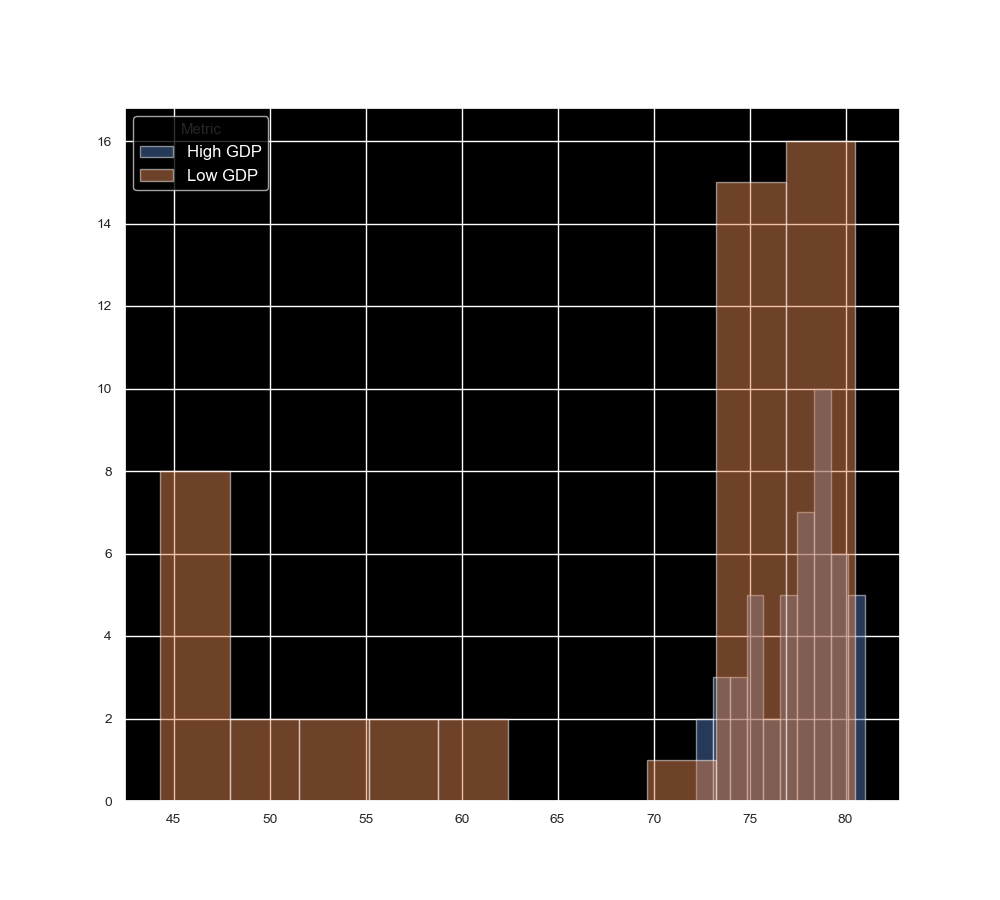

In [93]:
# Create figure
plt.figure(figsize=(10, 9))
# Use Matplotlib to create the Histogram
ax = plt.hist(high_gdp["LEABY"], alpha = 0.5, label = "High GDP")
ax = plt.hist(low_gdp["LEABY"], alpha = 0.5, label = "Low GDP")
# Add a title
plt.title('\nCountries with High GDP VS Low GDP\n', fontsize=20, color='white')
# Legend to the left
legend = plt.legend(loc='upper left', title='Metric', fontsize=12)
plt.setp(legend.get_texts(), color='w')
plt.show()

We can now truly see the impact GDP has on life expectancy.

Once again, consider a country that has a life expectancy of 70 years. If that country is in the top half of GDP countries, is it in the first, second, third, or fourth quarter of the data with respect to life expectancy?

What if the country is in the bottom half of GDP countries?

70 is below the first quartile of the high GDP dataset, so it falls in the first quarter of that dataset. 70 is between the first and second quartile of the low GDP dataset, so it falls in the second quarter.

## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??